##### import library

In [ ]:
!pip3 install kmodes


'pip3' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
pwd

'C:\\Users\\kang0234'

In [ ]:
import pandas as pd
import numpy as np
import kmodes as kmodes
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from kmodes.kprototypes import KPrototypes

##### Read data 
GenderCode	Age	TicketNum	BkdClassOfService	BookingChannel	UflyMemberStatus	BaseFareAmt

In [ ]:
df_05 = pd.read_csv("clustering_05%_data.csv",
                 dtype={'GenderCode':'str', 'Age':'float', 'TicketNum':'float', 'BkdClassOfService':'str',
                        'BookingChannel':'str', 'UflyMemberStatus':'str', 'BaseFareAmt':'float'})

NameError: ignored

In [ ]:
df_05 = df_05.drop(columns=['Unnamed: 0'])


In [ ]:
df_05.head()

,GenderCode,Age,TicketNum,BkdClassOfService,BookingChannel,UflyMemberStatus,BaseFareAmt
0,F,0.43,0.11,Coach,SY Vacation,Nonmember,0.06
1,F,0.59,0.04,Coach,Outside Booking,Nonmember,0.08
2,M,0.39,0.04,Coach,SY Vacation,Standard,0.03
3,F,0.74,0.04,Coach,Outside Booking,Nonmember,0.06
4,M,0.52,0.04,Coach,SCA Website Booking,Nonmember,0.06


In [ ]:
# 04_23

100.0

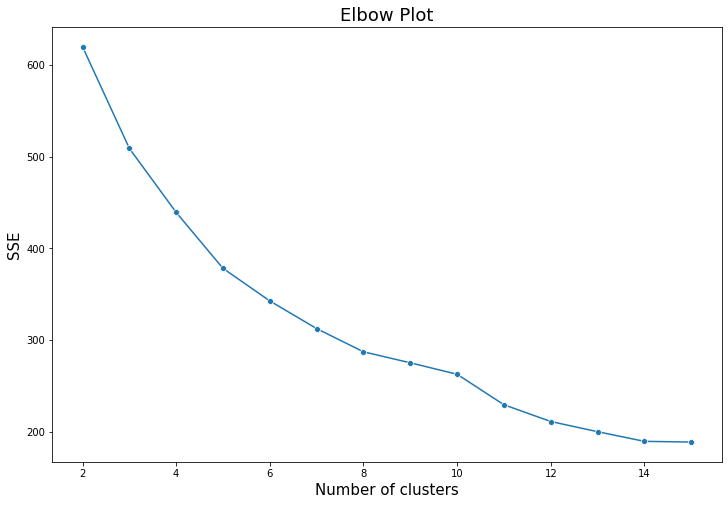

In [ ]:
# Index of categorical columns (requirment for kprototypes)
categorical_index = [0,3,4,5]

# Function for plotting elbow curve
def plot_elbow_curve(start, end, data):
    no_of_clusters = list(range(start, end+1))
    cost_values = []

    for k in no_of_clusters:
        kp_model = KPrototypes(n_clusters=k,random_state=10)
        kp_model.fit_predict(data.values, categorical=categorical_index)
        cost_values.append(kp_model.cost_)

    #sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)
    plt.figure(figsize=(12, 8))
    ax = sns.lineplot(x=no_of_clusters, y=cost_values, marker="o", dashes=False)
    ax.set_title('Elbow Plot', fontsize=18)
    ax.set_xlabel('Number of clusters', fontsize=15)
    ax.set_ylabel('SSE', fontsize=15)
    plt.plot();

# Plotting elbow curve for k=2 to k=10
plot_elbow_curve(start=2,end=15,data = df_05[['GenderCode', 'Age', 'TicketNum', 'BkdClassOfService','BookingChannel', 'UflyMemberStatus','BaseFareAmt']])


- 3 and 4 has the highest reduce on SSE
- 8 can also consider as elbow

### 8 cluster 

In [ ]:
df_05_8cluster = df_05.copy()

In [ ]:
kp_model_08 = KPrototypes(n_clusters=8,random_state=10)
cls_assignment = kp_model_08.fit_predict(df_05_8cluster.values, categorical=[0,3,4,5])
df_05_8cluster['cluster'] = cls_assignment

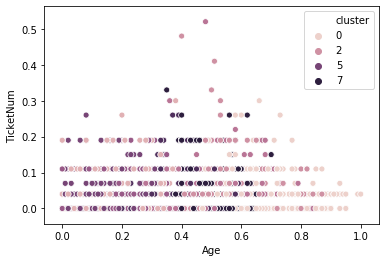

In [ ]:
sns.scatterplot(data = df_05_8cluster, x='Age',y='TicketNum',hue='cluster')

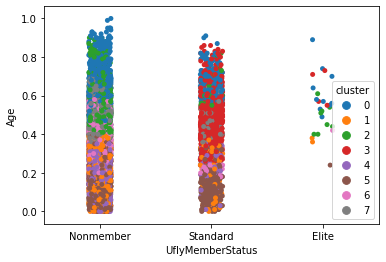

In [ ]:
sns.stripplot(x="UflyMemberStatus", y="Age", data=df_05_8cluster, hue="cluster")


### 4 cluster 

In [ ]:
df_05_4cluster = df_05.copy()

In [ ]:
kp_model_4 = KPrototypes(n_clusters=4,random_state=10)
cls_assignment = kp_model_4.fit_predict(df_05_4cluster.values, categorical=[0,3,4,5])
df_05_4cluster['cluster'] = cls_assignment


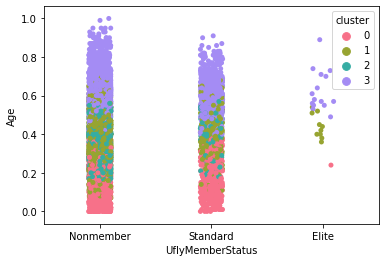

In [ ]:
sns.stripplot(x="UflyMemberStatus", y="Age", data=df_05_4cluster, hue="cluster", palette="husl")


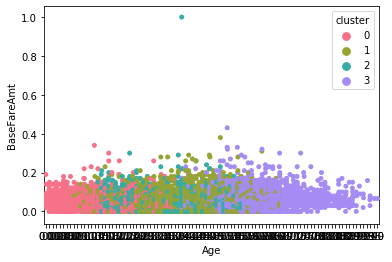

In [ ]:
sns.stripplot(x="Age", y="BaseFareAmt", data=df_05_4cluster, hue="cluster", palette="husl")


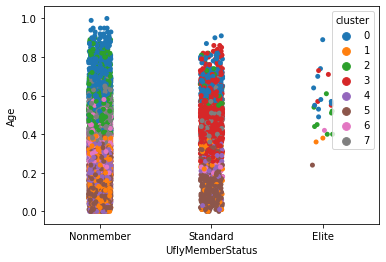

In [ ]:
sns.stripplot(x="UflyMemberStatus", y="Age", data=df_05, hue="cluster")


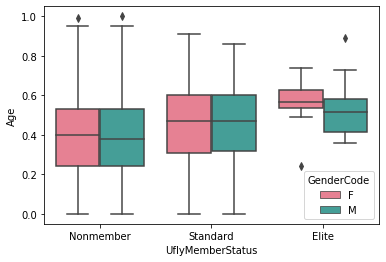

In [ ]:
sns.boxplot(x="UflyMemberStatus", y="Age", data=df_05_4cluster, hue ="GenderCode",palette="husl")


- in elite, female has higher age

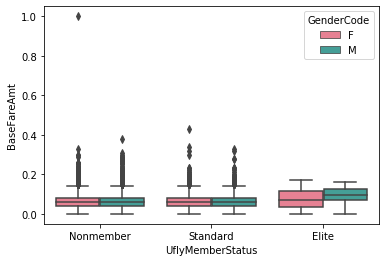

In [ ]:
sns.boxplot(x="UflyMemberStatus", y="BaseFareAmt", data=df_05_4cluster, hue ="GenderCode",palette="husl")


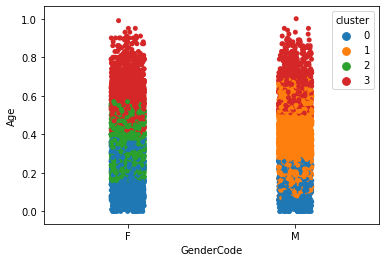

In [ ]:
sns.stripplot(x="GenderCode", y="Age", data=df_05_4cluster, hue ="cluster")


In [ ]:
sns.stripplot(x="UflyMemberStatus", y="Age", data=df_05_4cluster, hue ="cluster",palette="husl")


NameError: ignored

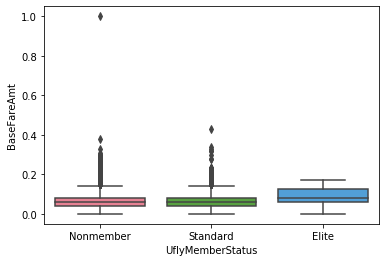

In [ ]:
sns.boxplot(x="UflyMemberStatus", y="BaseFareAmt", data=df_05_4cluster, palette="husl")


In [ ]:
sns.scatterplot(x="UflyMemberStatus", y="Gender", data=df_05_4cluster, palette="husl")


ValueError: Could not interpret input 'Gender'

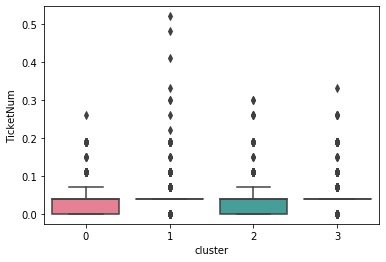

In [ ]:
sns.boxplot(x="cluster", y="TicketNum", data=df_05_4cluster, palette="husl")


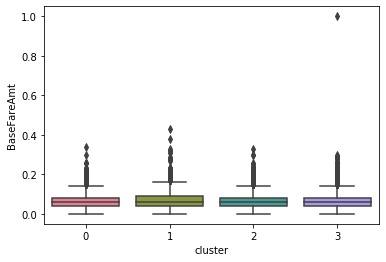

In [ ]:
sns.boxplot(x="cluster", y="BaseFareAmt", data=df_05_4cluster, palette="husl")
